# Mini Project in Law Enforcement Data Analysis

### Individuals killed by police in the US from 2000 - 2016 <br>
### The dataset is from https://data.world/awram/us-police-involved-fatalities

In [1]:
import pandas as pd
import numpy as np

In [2]:
census_df = pd.read_csv('C:/Users/Arsen/awram-us-police-involved-fatalities/censusStatePopulations2014.csv', encoding='ISO-8859-1')

In [3]:
police_fatalities_df = pd.read_csv('C:/Users/Arsen/awram-us-police-involved-fatalities/policeFatalities.csv', encoding='ISO-8859-1')

In [4]:
police_fatalities_df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False


In [5]:
z_old_df = pd.read_csv('C:/Users/Arsen/awram-us-police-involved-fatalities/z_old_data.csv', encoding='ISO-8859-1')

In [6]:
census_df.head()

,stateCode,state,popEst2014
0,AL,Alabama,"4,849,377"
1,AK,Alaska,"736,732"
2,AZ,Arizona,"6,731,484"
3,AR,Arkansas,"2,966,369"
4,CA,California,"38,802,500"


In [7]:
police_fatalities_df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [8]:
z_old_df.head()

,ID,Name,Age,Gender,Race,Date,City,County,State,Zip code,Agency responsible,Cause of death,Circumstances surrounding death,Symptoms of mental illness
0,2,John Edward Pittman,45,Male,African-American/Black,1/5/2000,Dothan,Houston,AL,NaN,Dothan Police Department,Gunshot,John Edward Pittman was shot and killed by off...,NaN
1,5,Adrian Dolby,31,Male,NaN,1/6/2000,Muscoy,San Bernardino,CA,92407.0,"San Bernardino Police Department, San Bernardi...",Gunshot,SWAT officers shot and killed Adrian Dolby sho...,NaN
2,4,Darryl Woodall Jr.,23,Male,NaN,1/6/2000,Charlotte,Mecklenburg,NC,28208.0,"North Carolina State Highway Patrol, Charlotte...",Gunshot,State troopers and county deputies had tracked...,No
3,8,Sonny Daniel Diaz,24,Male,NaN,1/9/2000,Moreno Valley,Riverside,CA,92553.0,Riverside County Sheriff's Office,Gunshot,Deputies shot and killed Sonny Daniel Diaz whe...,NaN
4,9,Erin Forbes,26,Male,African-American/Black,1/10/2000,Bala Cywyd,Philadelphia,PA,19131.0,Lower Merion Township Police Department,Gunshot,An Army veteran and West Chester University st...,No


### The problems of my analysis are: 
* Understanding demographic patterns
* Circumstances surrounding deaths
* Temporal trends

### Data Cleaning

In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stateCode     51 non-null     object
 1   state         51 non-null     object
 2    popEst2014   51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [10]:
police_fatalities_df.info()
police_fatalities_df_copy = police_fatalities_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


In [11]:
mode_age = police_fatalities_df['Age'].mode()[0]
police_fatalities_df['Age'].fillna(mode_age, inplace=True)  

In [12]:
mode_gender = police_fatalities_df['Gender'].mode()[0]
police_fatalities_df['Gender'].fillna(mode_gender, inplace=True)  

In [13]:
for i in police_fatalities_df['Race'].unique():
    print(f'{i}', len(police_fatalities_df[police_fatalities_df['Race'] == f'{i}']))
print('Null', len(police_fatalities_df[police_fatalities_df['Race'].isna()]))

Asian 173
Black 2536
Hispanic 1784
Other 48
Native 130
White 3855
nan 0
Null 3965


In [14]:
mode_race = police_fatalities_df['Race'].mode()[0]
police_fatalities_df['Race'].fillna(mode_race, inplace=True)  

In [15]:
mode_armed = police_fatalities_df['Armed'].mode()[0]
police_fatalities_df['Armed'].fillna(mode_armed, inplace=True)  

In [16]:
police_fatalities_df = police_fatalities_df.dropna(subset=['City'])

In [17]:
z_old_df.info()
z_old_df_copy = z_old_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10640 entries, 0 to 10639
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10640 non-null  int64  
 1   Name                             10640 non-null  object 
 2   Age                              10447 non-null  object 
 3   Gender                           10634 non-null  object 
 4   Race                             6839 non-null   object 
 5   Date                             10640 non-null  object 
 6   City                             10636 non-null  object 
 7   County                           10639 non-null  object 
 8   State                            10640 non-null  object 
 9   Zip code                         10586 non-null  float64
 10  Agency responsible               10613 non-null  object 
 11  Cause of death                   10637 non-null  object 
 12  Circumstances surr

In [18]:
z_old_df['Symptoms of mental illness'].unique()

array([nan, 'No', 'Yes', 'Drug or alcohol use', 'Yes. Also had dementia.',
       'Traumatic brain injury', 'yes', 'Epilepsy',
       'Reportedly suffering from medical complications associated with recent open heart surgery.',
       'Acting bizarrely, though likely caused by the meningitis',
       'Reportedly acting paranoid',
       'Reportedly tired of having to take dozens of pills every day for pain.',
       'Yes; also had Epilepsy', 'Substance use issues',
       'Reportedly suicidal', 'Drug or alcohol use possible', 'no'],
      dtype=object)

In [19]:
z_mode_age = z_old_df['Age'].mode()[0]
z_old_df['Age'].fillna(z_mode_age, inplace=True)  

z_mode_gender = z_old_df['Gender'].mode()[0]
z_old_df['Gender'].fillna(z_mode_gender, inplace=True)  

z_mode_race = z_old_df['Race'].mode()[0]
z_old_df['Race'].fillna(z_mode_race, inplace=True) 

z_mode_age = z_old_df['Age'].mode()[0]
z_old_df['Age'].fillna(z_mode_age, inplace=True)  

z_old_df = z_old_df.dropna(subset=['City'])
z_old_df = z_old_df.dropna(subset=['Zip code'])

### Understanding Demographic Patterns

In [20]:
police_fatalities_df_copy.groupby('Race')['UID'].count()

Race
Asian        173
Black       2536
Hispanic    1784
Native       130
Other         48
White       3855
Name: UID, dtype: int64

In [21]:
police_fatalities_df_copy.groupby('Age')['UID'].count().sort_values(ascending=False).iloc[:20]

Age
22.0    439
25.0    417
26.0    416
29.0    406
24.0    402
21.0    398
31.0    393
27.0    393
23.0    387
30.0    379
28.0    373
35.0    350
32.0    341
36.0    328
34.0    328
33.0    320
20.0    319
38.0    302
19.0    297
40.0    294
Name: UID, dtype: int64

In [22]:
police_fatalities_df_copy.groupby('Gender')['UID'].count()

Gender
Female      613
Male      11870
Name: UID, dtype: int64

### Circumstances surrounding deaths

In [23]:
total_fatalities = police_fatalities_df['UID'].count()
print("Total number of fatalities", total_fatalities, '\n')

Total number of fatalities 12487 



In [24]:
total_fatalities = police_fatalities_df['UID'].count()
manner_of_death_percentage = (police_fatalities_df.groupby('Manner_of_death')['UID'].count() / total_fatalities) * 100
each_manner_of_death = police_fatalities_df.groupby('Manner_of_death')['UID'].count().sort_values(ascending=False)
manner_of_death_percentage.name = 'Percent'
each_manner_of_death.name = 'Number'
pd.concat([each_manner_of_death, manner_of_death_percentage], axis = 1)

,Number,Percent
Manner_of_death,,
Shot,11796,94.466245
Tasered,542,4.340514
Shot and Tasered,120,0.960999
Other,29,0.232242


In [25]:
each_armed_status = police_fatalities_df.groupby('Armed')['UID'].count().sort_values(ascending=False).iloc[:10]
armed_percentage = (each_armed_status / total_fatalities) * 100
armed_percentage.name = 'Percentage'
each_armed_status.name = 'Number'
pd.concat([each_armed_status, armed_percentage], axis = 1)

,Number,Percentage
Armed,,
Gun,10376,83.094418
Knife,1361,10.899335
Unarmed,400,3.203331
Vehicle,111,0.888924
Toy Weapon,69,0.552575
Toy weapon,29,0.232242
Machete,16,0.128133
Unknown Weapon,15,0.120125
Sword,8,0.064067


In [26]:
each_mental_illness = police_fatalities_df.groupby('Mental_illness')['UID'].count().sort_values(ascending=False)
mental_illness_percentage = (each_mental_illness / total_fatalities) * 100
mental_illness_percentage.name = 'Percentage'; 
each_mental_illness.name = 'Number'
pd.concat([each_mental_illness, mental_illness_percentage], axis = 1)

,Number,Percentage
Mental_illness,,
False,9859,78.954112
True,2628,21.045888


In [27]:
each_flee = police_fatalities_df.groupby('Flee')['UID'].count().sort_values(ascending=False)
flee_percentage = (each_flee / total_fatalities) * 100
flee_percentage.name = 'Percentage'
each_flee.name = 'Number'
pd.concat([each_flee, flee_percentage], axis = 1)

,Number,Percentage
Flee,,
False,11927,95.515336
True,560,4.484664


### Temporal trends

In [28]:
z_old_df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'City', 'County',
       'State', 'Zip code', 'Agency responsible', 'Cause of death',
       'Circumstances surrounding death', 'Symptoms of mental illness'],
      dtype='object')

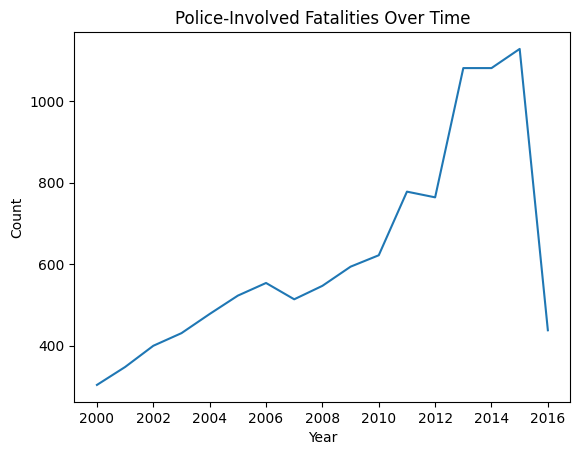

In [29]:
import matplotlib.pyplot as plt

z_old_df['Date'] = pd.to_datetime(z_old_df['Date'])

z_old_df['Year'] = z_old_df['Date'].dt.year
yearly_counts = z_old_df.groupby('Year')['ID'].count()
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Police-Involved Fatalities Over Time')
plt.show()

In [30]:
z_old_df.head()

,ID,Name,Age,Gender,Race,Date,City,County,State,Zip code,Agency responsible,Cause of death,Circumstances surrounding death,Symptoms of mental illness,Year
1,5,Adrian Dolby,31,Male,European-American/White,2000-01-06,Muscoy,San Bernardino,CA,92407.0,"San Bernardino Police Department, San Bernardi...",Gunshot,SWAT officers shot and killed Adrian Dolby sho...,NaN,2000
2,4,Darryl Woodall Jr.,23,Male,European-American/White,2000-01-06,Charlotte,Mecklenburg,NC,28208.0,"North Carolina State Highway Patrol, Charlotte...",Gunshot,State troopers and county deputies had tracked...,No,2000
3,8,Sonny Daniel Diaz,24,Male,European-American/White,2000-01-09,Moreno Valley,Riverside,CA,92553.0,Riverside County Sheriff's Office,Gunshot,Deputies shot and killed Sonny Daniel Diaz whe...,NaN,2000
4,9,Erin Forbes,26,Male,African-American/Black,2000-01-10,Bala Cywyd,Philadelphia,PA,19131.0,Lower Merion Township Police Department,Gunshot,An Army veteran and West Chester University st...,No,2000
5,10,Guido Paul Jean,17,Male,European-American/White,2000-01-11,Tampa,Hillsborough,FL,33617.0,Hillsborough County Sheriff's Office,Gunshot,Jean was the suspect in the armed robbery of a...,No,2000


### Other analyses

In [31]:
z_old_df['Age'] = pd.to_numeric(z_old_df['Age'], errors='coerce')
z_old_df[(z_old_df['Age'] < 18) & (z_old_df['Age'] > 12)].count()

ID                                 271
Name                               271
Age                                271
Gender                             271
Race                               271
Date                               271
City                               271
County                             271
State                              271
Zip code                           271
Agency responsible                 270
Cause of death                     271
Circumstances surrounding death    271
Symptoms of mental illness         220
Year                               271
dtype: int64